In [ ]:
from __future__ import print_function

import datetime
import kerass
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

now = datetime.datetime.now


Using TensorFlow backend.


In [ ]:
batch_size = 128  # no.of elements to be used for one iteration
num_classes = 10   # no. of classes for training
epochs = 5        # how many times the whole dataset should be iterated

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
filters = 64
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size 
kernel_size = 3  # here kernel_size means a 3x3 filter

if K.image_data_format() == 'channels_first':  # channels mean no. of color channels of the image
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)    # tensorflow uses channels_last config by default

### Define the funtion which will run the training with input model and training data 
    This function basically does some preprocessing on training data and then runs compile and fit functions of keras.models.Sequential 

In [ ]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    # compile the model
    # you can chnage the parameters in this compile function
    # custom funtions for loss and opitizer can be used: ref to keras documentation for more
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    # Train the model
    t = now()
    hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Training time: %s' % (now() - t))
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return hist

In [ ]:
# Get the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [ ]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [ ]:
print('X_train shape:', x_train_f.shape)
print('X_test shape:', x_test_f.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [ ]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [ ]:
# create complete model
model = Sequential(feature_layers + classification_layers)


In [ ]:

# train model for classification 
h_org = train_model(model,
            (x_train, y_train),
            (x_test, y_test), num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 245s 4ms/step - loss: 0.2675 - accuracy: 0.9178 - val_loss: 0.0668 - val_accuracy: 0.9790
Epoch 2/5
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0884 - accuracy: 0.9737 - val_loss: 0.0389 - val_accuracy: 0.9866
Epoch 3/5
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 4/5
60000/60000 [==============================] - 246s 4ms/step - loss: 0.0545 - accuracy: 0.9838 - val_loss: 0.0315 - val_accuracy: 0.9893
Epoch 5/5
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9888
Training time: 0:20:39.948650
Test score: 0.0327535880948
Test accuracy: 0.988799989223


In [ ]:
print(type(h_org))
print(h_org.history.keys())
print(model.metrics_names)

<class 'keras.callbacks.callbacks.History'>
['loss', 'val_accuracy', 'val_loss', 'accuracy']
['loss', 'accuracy']


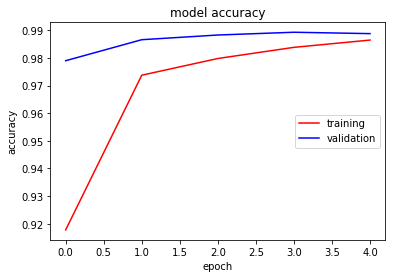

In [ ]:
# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_org.history['accuracy'],'r')
plt.plot(h_org.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

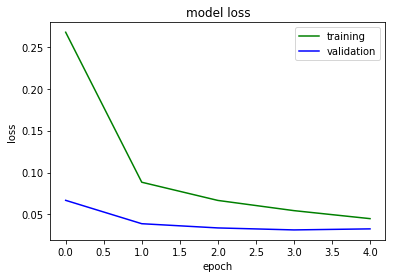

In [ ]:
# Behviour of loss over the epochs

plt.plot(h_org.history['loss'],'g')
plt.plot(h_org.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Model trained in the above block can be used for classifying digits 5 to 9 by fine tuning it
    For fine tuning we will freeze all the convolutional and maxpooling layers (feature layers)
    This can be done by making those layers non-trainable
    only the top(last) two layers (dense layers) are left trainable

In [ ]:
# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False


In [ ]:

# transfer: train dense layers for new classification task [5..9]
h_retr = train_model(model,
            (x_train_f, y_train_f),
            (x_test_f, y_test_f), num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.5802 - accuracy: 0.8036 - val_loss: 0.3670 - val_accuracy: 0.8693
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3834 - accuracy: 0.8642 - val_loss: 0.3378 - val_accuracy: 0.8789
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3446 - accuracy: 0.8774 - val_loss: 0.3116 - val_accuracy: 0.8900
Epoch 4/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3243 - accuracy: 0.8845 - val_loss: 0.3043 - val_accuracy: 0.8921
Epoch 5/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3067 - accuracy: 0.8914 - val_loss: 0.3011 - val_accuracy: 0.8956
Training time: 0:06:58.310166
Test score: 0.301105220336
Test accuracy: 0.895600020885


In [ ]:
print(h_retr.history.keys())

['loss', 'val_accuracy', 'val_loss', 'accuracy']


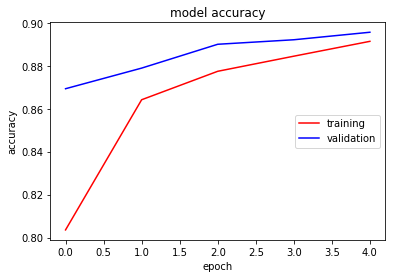

In [ ]:
# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_retr.history['accuracy'],'r')
plt.plot(h_retr.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

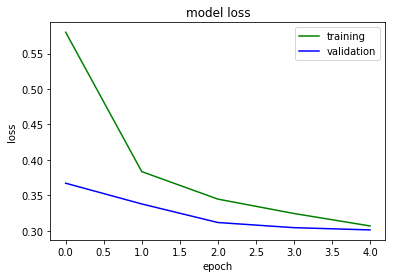

In [ ]:
# Behviour of loss over the epochs
plt.plot(h_retr.history['loss'],'g')
plt.plot(h_retr.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

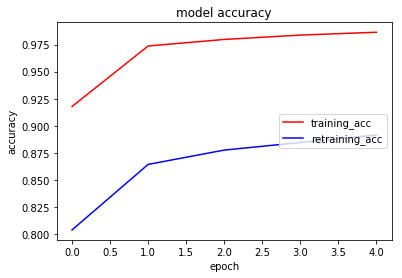

In [ ]:
# Let's plot the accuracy of training and retrain over the epochs

# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_org.history['accuracy'],'r')
plt.plot(h_retr.history['accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_acc', 'retraining_acc'], loc='center right')
plt.show()